In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Tout d'abord on lit le fichier csv et on convertit les différentes données initialement en points en des unités SI

In [19]:
df = pd.read_csv('FILE000.csv', sep=",")
print(df)

temps = df['time']
ax = df['ax']/4096
ay = df['ay']/4096
az = df['az']/4096
gx = df['gx']/32.8*np.pi/180
gy = df['gy']/32.8*np.pi/180
gz = df['gz']/32.8*np.pi/180


        time  ax   ay    az  gx  gy  gz
0     142823 -10  -47  4129 -60 -13 -15
1     142825 -10  -82  4122 -58  -7 -14
2     142827  16  -81  4140 -57 -13 -17
3     142829 -15  -61  4097 -52 -14 -15
4     142831 -15  -86  4116 -54  -9 -15
...      ...  ..  ...   ...  ..  ..  ..
9270  161482 -26  -81  4139 -50 -17 -19
9271  161484 -41 -114  4155 -53 -10 -16
9272  161486  -9  -80  4123 -52 -14 -15
9273  161488 -12  -77  4119 -47 -18 -13
9274  161490 -22  -92  4134 -47 -12 -23

[9275 rows x 7 columns]


#### Alternativement on peut directement récupérer les données par le port série connecté à l'arduino

In [14]:
import serial
import time

# On crée la communication par le port série (USB) avec l'arduino
ser = serial.Serial(port='COM7', baudrate=115200)

# On crée et ouvre un fichier csv dans lequel ou enregistrera les données recues
file = open(time.strftime("%Y%m%d-%H%M%S")+".csv","w")

# On crée les listes pythons dans lesquelles seront stockées les données
temps, ax, ay, az, gx, gy, gz = [], [], [],[], [], [],[]

# L'instruction "try" "except" permet de terminer correctement le code quand celui-ci est interrompu
try:
    # On boucle de manière continue le code de récupération des données
    while 1:
        # Dans l'ordre, on récupère les données par le port série, on décode les octets en une chaine de caractères ASCII,
        data = ser.readline().decode('ascii')
        
        # On affiche les données recues 
        print(data, end='')
        
        # On vérifie que l'on a bien recu des données (et pas une ligne de commentaire)
        if data[0].isdigit():
            # On sauvegarde les données dans le fichier csv
            file.write(data)

            data = data.split(";")
            
            # Et on ajoute les données aux listes
            temps.append(int(data[0]))
            ax.append(int(data[1]))
            ay.append(int(data[2]))
            az.append(int(data[3]))
            gx.append(int(data[4]))
            gy.append(int(data[5]))
            gz.append(int(data[6]))

            

# Si le programme est interrompu, on ferme le port série et le fichier
except KeyboardInterrupt:
    ser.close()
    file.close()

# On convertit en unité SI
ax = np.array(ax)/4096
ay = np.array(ay)/4096
az = np.array(az)/4096
gx = np.array(gx)/32.8*np.pi/180
gy = np.array(gy)/32.8*np.pi/180
gz = np.array(gz)/32.8*np.pi/180


194437951;2243;6370;6285;-211;-75;-17
194442984;2239;6379;6271;-206;-78;-16
194447995;2240;6381;6262;-212;-74;-16
194453035;2232;6374;6281;-222;-74;-14
194458048;2247;6374;6273;-215;-75;-17
194463086;2230;6378;6279;-209;-76;-19
194468110;2228;6379;6279;-204;-76;-20
194473154;2234;6374;6262;-200;-75;-19
194478192;2232;6381;6271;-222;-76;-15
194483210;2247;6373;6268;-228;-68;-12
194488234;2233;6376;6290;-214;-76;-16
194493261;2231;6373;6271;-207;-75;-15
194498286;2241;6383;6294;-206;-77;-20
194503312;2254;6372;6280;-204;-81;-21
194508338;2231;6381;6299;-216;-74;-15
194513364;2242;6382;6301;-217;-76;-16
194518389;2228;6353;6271;-218;-75;-14
194523415;2232;6375;6269;-218;-70;-16
194528415;2246;6378;6287;-211;-73;-16
194533453;2238;6374;6279;-203;-80;-22
194538465;2240;6387;6271;-204;-77;-19
194543491;2238;6381;6278;-207;-75;-21
194548518;2228;6385;6259;-216;-73;-20
194553556;2240;6382;6294;-224;-73;-14
194558569;2229;6374;6286;-218;-71;-16
194563608;2238;6383;6279;-212;-73;-16
194568620;22

In [ ]:
# Si nécessaire pour fermer le port série et le fichier en cas d'erreur (résout généralement le problème d'accès refusé)
ser.close()
file.close()

##### On peut ensuite tracer les différentes accélérations

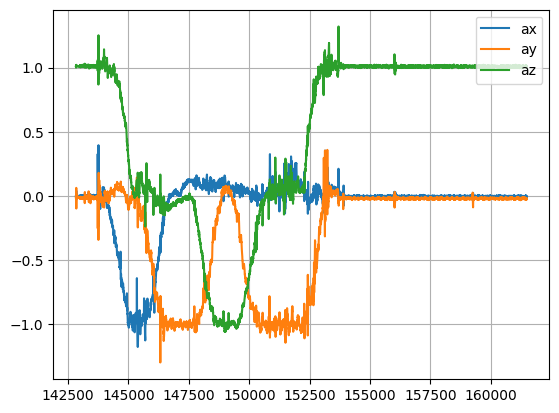

In [20]:
plt.plot(temps, ax, label='ax')
plt.plot(temps, ay, label='ay')
plt.plot(temps, az, label='az')
plt.legend(loc='upper right')
plt.grid()
plt.show()

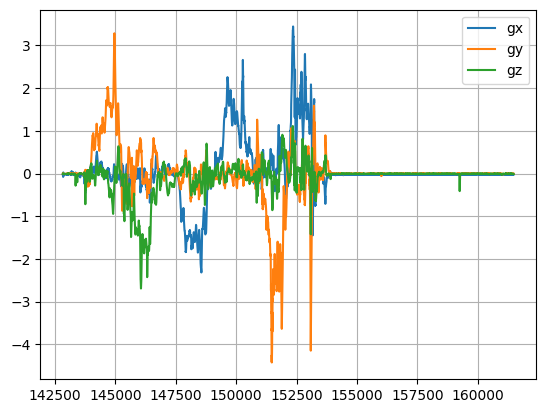

In [21]:
plt.plot(temps, gx, label="gx")
plt.plot(temps, gy, label="gy")
plt.plot(temps, gz, label="gz")
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [22]:
weight=0.99

frequency = 750

acc = np.array([ax, ay, az])
gyro =  np.array([gx, gy, gz])


data=[[0],[0],[0]]
for u in range(len(gyro[0])):
    yawg = data[0][-1] + gyro[2][u] / frequency 
    rollg = data[1][-1] - gyro[1][u] / frequency * np.sin(yawg)
    pitchg = data[2][-1] + gyro[0][u] / frequency * np.sin(yawg)

    rolla = np.arcsin(acc[0][u]/np.sqrt(acc[0][u]**2+acc[1][u]**2+acc[2][u]**2))
    pitcha = np.arcsin(acc[1][u]/np.sqrt(acc[0][u]**2+acc[1][u]**2+acc[2][u]**2))
    
    roll=rollg*weight+rolla*(1.0-weight)
    pitch=pitchg*weight+pitcha*(1.0-weight)

    data[0].append(yawg)
    data[1].append(roll)
    data[2].append(pitch)
    
data=np.array([data[0][1:], data[1][1:], data[2][1:]])


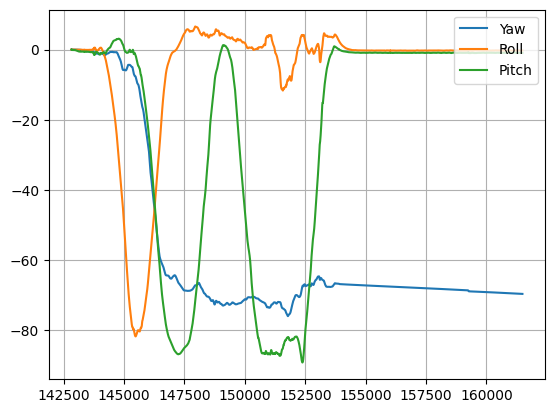

In [23]:
plt.plot(temps, data[0]*180/np.pi, label='Yaw')
plt.plot(temps, data[1]*180/np.pi, label='Roll')
plt.plot(temps, data[2]*180/np.pi, label='Pitch')
plt.legend(loc='upper right')
plt.grid()
plt.show()